**Genomic Visualization Tool: Analyzing DNA Sequences with Biopython and Matplotlib**

the packages used are Biopython, pandas and matplotlib.

In [59]:
import Bio
from Bio import SeqIO
import matplotlib.pyplot as plt 

finding the individual nucleotide count in a selected sequence, and also finding number of masked / unknown regions in the sequence.

In [3]:
#individual nucleotide count 

result = SeqIO.parse(handle="sequence-2.fasta",format="fasta")
for NA in result:
    print(NA.description)
    A_ = "Count of A = "  + str(NA.count("A"))
    B_ = "Count of T = "  + str(NA.count("T"))
    C_ = "Count of G = "  + str(NA.count("G"))
    D_ = "Count of C = "  + str(NA.count("C"))
    E_ = "Count of 'N' = " + str(NA.count("N"))

print(A_,B_,C_,D_,E_)

NC_000022.11 Homo sapiens chromosome 22, GRCh38.p14 Primary Assembly
Count of A = 10382214 Count of T = 10370725 Count of G = 9246186 Count of C = 9160652 Count of 'N' = 11658686


visualizing the composition of each nucleotide, finding the AT and GC counts, and the AT:GC ratio 

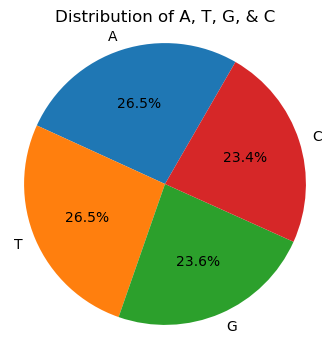

In [14]:
#percent visualization of each nucleotide

import matplotlib.pyplot as plt
counts = { 
    'A': NA.count("A"),
    'T': NA.count("T"),
    'G': NA.count("G"),
    'C': NA.count("C")
}
plt.figure(figsize=(4, 4))
plt.pie(counts.values(), labels=counts.keys(), autopct='%1.1f%%', startangle=60)
plt.title('Distribution of A, T, G, & C')
plt.axis('equal')
plt.show()

In [24]:
# Nucleotide composition analysis 
AT_count = NA.count("A") + NA.count("T")
print("AT Count : " + str(AT_count))

GC_count = NA.count("G") + NA.count("C")
print("GC Count : " + str(GC_count))

AT_GC_ratio = AT_count / GC_count
print("AT-GC ratio : " + str(AT_GC_ratio))

AT Count : 20752939
GC Count : 18406838
AT-GC ratio : 1.1274581218132087


removing the masked / unknown regions of the DNA sequence ie; cleaning the sequence 

In [27]:
#removing the unknown regions from the DNA file of chromosome 22

from Bio import SeqIO
from Bio.Seq import Seq

input_fasta_file = "/Users/saurishpandkar/Desktop/Py/Saurish_Practice/sequence-2.fasta"
output_fasta_file = "/Users/saurishpandkar/Desktop/Py/Saurish_Practice/sequence-2-cleaned.fasta"

def remove_N_regions(seq):
    return Seq(str(seq).replace('N', ''))


with open(output_fasta_file, "w") as output_handle:
    for record in SeqIO.parse(input_fasta_file, "fasta"):
        record.seq = remove_N_regions(record.seq)
        SeqIO.write(record, output_handle, "fasta")

print("Cleaning complete.")

Cleaning complete.


transcribing the cleaned DNA sequence to an mRNA sequence for further analysis 

In [28]:
#transcribe the cleaned DNA sequence to an mRNA sequence 

from Bio import SeqIO

input_fasta_file = "/Users/saurishpandkar/Desktop/Py/Saurish_Practice/sequence-2-cleaned.fasta"
output_fasta_file = "/Users/saurishpandkar/Desktop/Py/Saurish_Practice/sequence-2-output.fasta"

with open(output_fasta_file, "w") as output_handle:
    for record in SeqIO.parse(input_fasta_file, "fasta"):
        transcribed_seq = record.seq.transcribe()
        record.seq = transcribed_seq
        SeqIO.write(record, output_handle, "fasta")

print("Transcription complete.")

Transcription complete.


finding the GC content in the transcribed mRNA 

In [35]:
#find the GC content in the transcribed mRNA 

from Bio import SeqIO

def gc_content(seq):
    gc_count = seq.count('G') + seq.count('C')
    total_bases = len(seq)
    gc_percentage = (gc_count / total_bases) * 100
    return gc_percentage


input_fasta_file = "/Users/saurishpandkar/Desktop/Py/Saurish_Practice/sequence-2-output.fasta"

for record in SeqIO.parse(input_fasta_file, "fasta"):
    gc = gc_content(record.seq)
    print("ID: {}, GC Content: {:.2f}%".format(record.id, gc))

ID: NC_000022.11, GC Content: 47.00%


Using ORF Finder, the largest ORF was found from NC_000022.11 to be ORF122 and now using the FASTA file of ORF122 we will perform certain analyses

In [53]:
#read the ORF protein sequence and find its total length 

from Bio import SeqIO

fasta_file = "ORF122.fasta"

for record in SeqIO.parse(fasta_file, "fasta"):
    ORF122_sequence = record.seq
    print("ORF122 ID: " + str(record.id))
    print("ORF122 Sequence: " + str(ORF122_sequence))
    print("Total length: " + str(len(ORF122_sequence)))

ORF122 ID: lcl|ORF122:16389:17432
ORF122 Sequence: MLSAPAAAAAFCPRPQHRGFFSPTPRLFAAAATGTAFWPRRLFAPTAAAFCSPPPRFLPTRLFTPLAAAFADAAFYSPPPRLLAAASFCPRHRGFLPPRLFGSAAAAFCPRRRGFLPPQPLLFAAFSPTAAGFADAAFCAHRRGFLLRAARFCPRRRGFLTPPPQLFPPVAGFRPHRSDFLPPPPRLFAPAATTFCGFLPTPPRLFPPPPELFAAAAFCPRRRGFLPPELSAPAAVAFSPDAAAFCPRLRGFFVPAAETFCRHSFLPAPPRLFVVFFAPTPAAFCSCHRGFLPPPRIFTPAAEDFSPGAAALRAGAADSAASSTGVLARAAPRGAPGPALLARGFFA
Total length: 347


visualize the amino acid content graphically

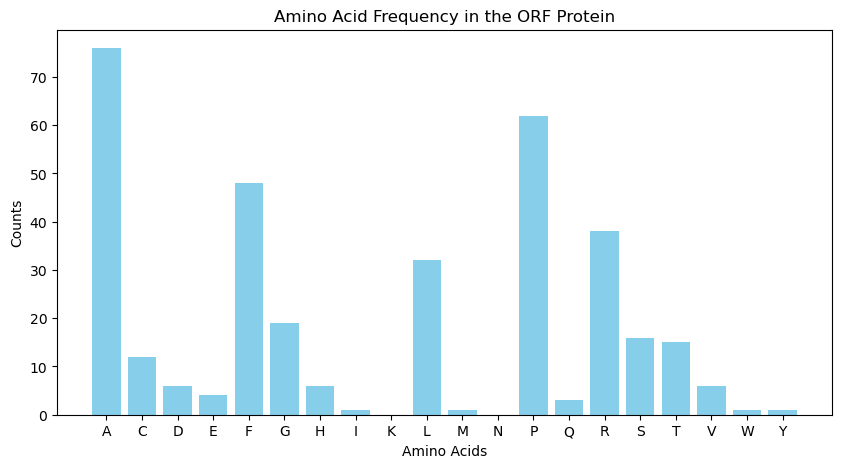

In [56]:
#graphically visualize the amino acid counts in the ORF protein 

from Bio import SeqIO
from Bio.SeqUtils import ProtParam
import matplotlib.pyplot as plt

fasta_file = "ORF122.fasta"

with open("ORF122.fasta", 'r') as file:
    record = SeqIO.read(file, 'fasta')
    sequence = str(record.seq)

protein_analysis = ProtParam.ProteinAnalysis(sequence)

amino_acid_counts = protein_analysis.count_amino_acids()
amino_acids = list(amino_acid_counts.keys())
counts = list(amino_acid_counts.values())

plt.figure(figsize=(10, 5))
plt.bar(amino_acids, counts, color='skyblue')
plt.xlabel('Amino Acids')
plt.ylabel('Counts')
plt.title('Amino Acid Frequency in the ORF Protein')
plt.show()

finding the isoelectric point and molecular weight of the amino acid sequence 

In [67]:
#isoelectric point and molecular weight analysis 

from Bio import SeqIO
from Bio.SeqUtils import ProtParam

fasta_file = "ORF122.fasta"

with open("ORF122.fasta", 'r') as file:
    record = SeqIO.read(file, 'fasta')
    sequence = str(record.seq)

protein_analysis = ProtParam.ProteinAnalysis(sequence)    

isoelectric_point = protein_analysis.isoelectric_point()
print("isoelectric point : " + str(isoelectric_point))

molecular_weight = protein_analysis.molecular_weight()
print("molecular weight : " + str(molecular_weight) + " Da")

isoelectric point : 11.767752647399902
molecular weight : 36895.73160000006 Da
